![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [94]:
# Imported libraries
library(tidyverse)

# Start coding here..
yearly <- read.csv("data/yearly_deaths_by_clinic.csv")

monthly <- read.csv("data/monthly_deaths.csv")

# Calculate the proportion of death per birth

yearly <- yearly %>% 
 	mutate(proportion_deaths = round(deaths/births * 100,2))

#Creating two ggplot line plots: one for the yearly proportion of deaths and another for the monthly proportion of deaths. For the yearly plot, create a different colored line for each clinic.

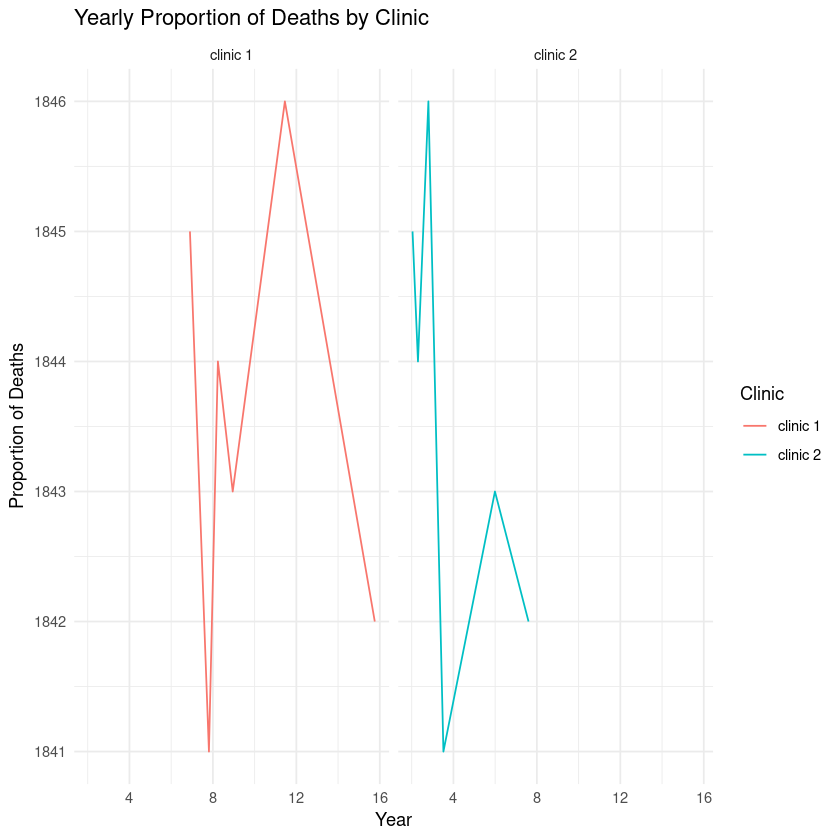

In [95]:
ggplot(yearly, aes(x = proportion_deaths, y = year, color = clinic)) +
	  geom_line() +
	facet_wrap(~ clinic) +
  	labs(title = "Yearly Proportion of Deaths by Clinic",
       x = "Year",
       y = "Proportion of Deaths",
       color = "Clinic") +
  		theme_minimal()



`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


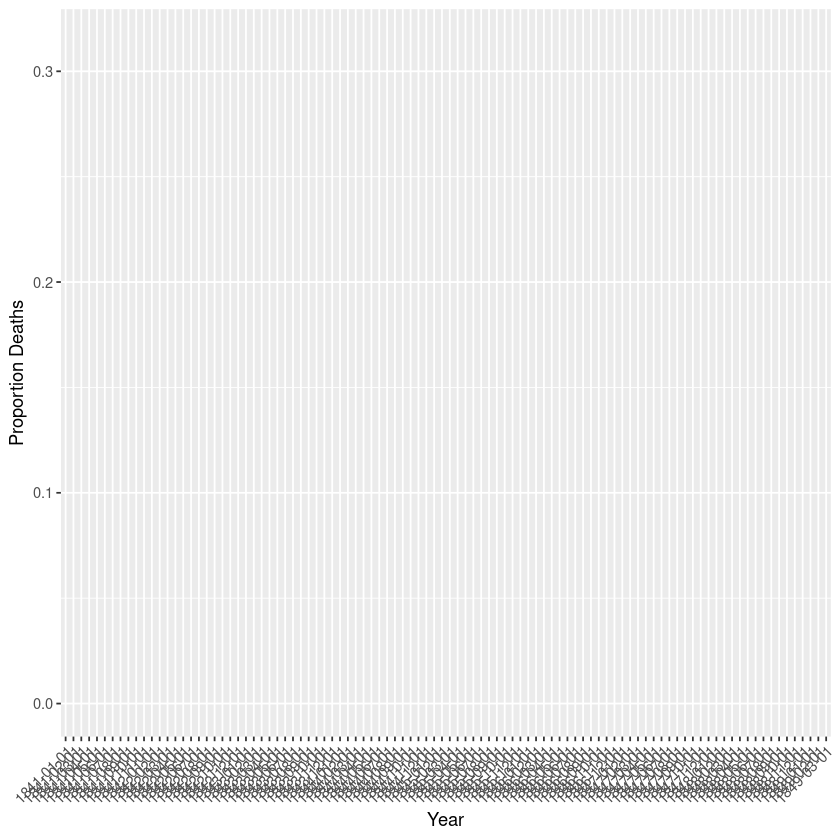

In [96]:
monthly <- monthly %>% 
  mutate(proportion_deaths = deaths / births)

ggplot(monthly, aes(date, proportion_deaths)) +
  geom_line() +
  labs(x = "Year", y = "Proportion Deaths") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [97]:
#Add a handwashing_started boolean column to monthly using June 1st, 1847 as the threshold; TRUE should mean that handwashing has started at the clinic. 

monthly <- monthly  %>% 
mutate(date = as.Date(date)) %>%
  mutate(handwashing_started = date >= "1847-06-01")

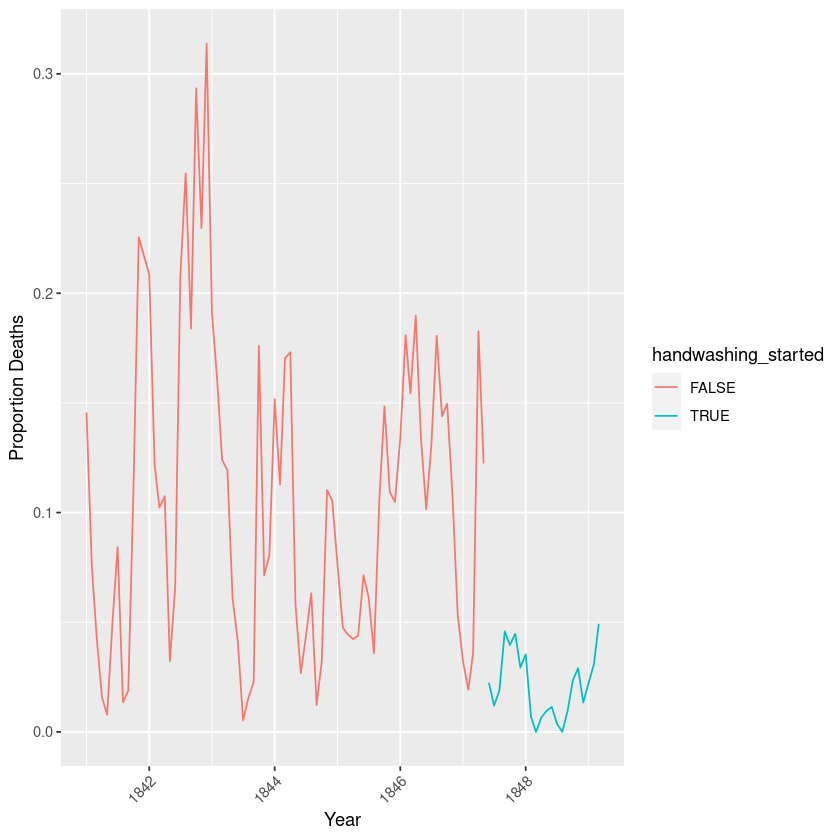

In [98]:
#Plot the new df with different colored lines depending on handwashing_started. 
ggplot(monthly, aes(date, proportion_deaths, color = handwashing_started)) +
  geom_line() +
  labs(x = "Year", y = "Proportion Deaths") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Calculate the mean proportion of deaths before and after handwashing from the monthly data, and store the result as a 2x2 df named monthly_summary with the first column containing the handwashing_started groups and the second column having the mean proportion of deaths.

In [99]:

# Calculate mean proportion of deaths before and after handwashing
monthly_summary <- monthly %>%
  group_by(handwashing_started) %>%
  summarize(mean_proportion_deaths = mean(deaths / births)*100)

# Print the summary dataframe
print(monthly_summary)


# A tibble: 2 × 2
  handwashing_started mean_proportion_deaths
  <lgl>                                <dbl>
1 FALSE                                10.5 
2 TRUE                                  2.11
